# Анализируем идеальные примеры

In [110]:
import torch
from datasets import load_dataset
import transformers as ts
import matplotlib.pyplot as plt

import seaborn as sns
import nltk
from nltk import pos_tag, word_tokenize
from tqdm import tqdm
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Распаковываем датасеты

In [2]:
tokenizer = ts.AutoTokenizer.from_pretrained('roberta-base', cache_dir=f"cache/tokenizer/roberta-base")

In [3]:
anli = load_dataset('anli', cache_dir='cache/data')['train_r1']
anli[0]


Reusing dataset anli (cache/data/anli/plain_text/0.1.0/aabce88453b06dff21c201855ea83283bab0390bff746deadb30b65695755c0b)


  0%|          | 0/9 [00:00<?, ?it/s]

{'uid': '0fd0abfb-659e-4453-b196-c3a64d2d8267',
 'premise': 'The Parma trolleybus system (Italian: "Rete filoviaria di Parma" ) forms part of the public transport network of the city and "comune" of Parma, in the region of Emilia-Romagna, northern Italy. In operation since 1953, the system presently comprises four urban routes.',
 'hypothesis': 'The trolleybus system has over 2 urban routes',
 'label': 0,
 'reason': ''}

In [4]:
samples = torch.load('anli_42/anli_train_sample_15')

## Определяем, какие строчки из исходного датасета участвуют в идеальных примерах

In [5]:
p, h = [], []
for row in samples:
    text = tokenizer.decode(row['input_ids'])
    text = text[3:-4]  # Removing <s> and </s>
    premise, hypothesis = text.split(tokenizer.sep_token)
    p.append(premise)
    h.append(hypothesis)

In [6]:
idx = []
for i in tqdm(range(len(anli))):
    if anli[i]['premise'] in p and anli[i]['hypothesis'] in h:
        idx.append(i)
print(len(idx))

100%|██████████| 16946/16946 [00:01<00:00, 15583.16it/s]

18


In [7]:
samples = anli.select(idx)


## Cмотрим на распределение лэйблов

(array([6., 7., 5.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

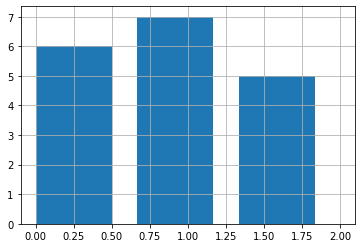

In [8]:
plt.grid()
plt.hist([row['label'] for row in samples], bins=3, width=0.5)

(array([5371., 7052., 4523.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

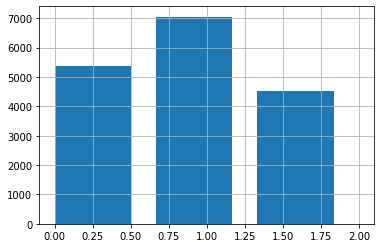

In [9]:
plt.grid()
plt.hist([row['label'] for row in anli], bins=3, width=0.5)

## Смотрим на распределение длины токенов

/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

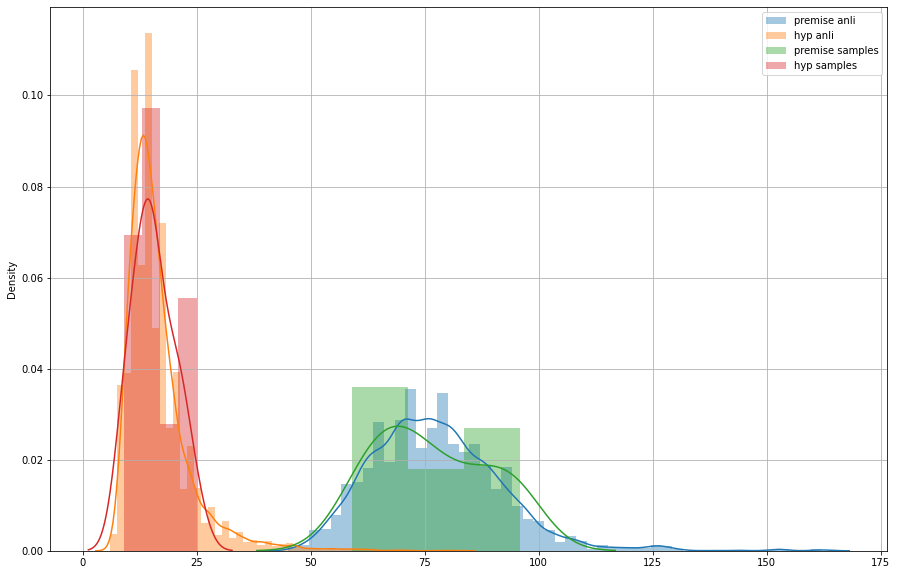

In [113]:
plt.figure(figsize=(15, 10))
sns.distplot([len(tokenizer.encode(row['premise'])) for row in anli], label='premise anli')
sns.distplot([len(tokenizer.encode(row['hypothesis'])) for row in anli], label='hyp anli')
sns.distplot([len(tokenizer.encode(row['premise'])) for row in samples], label='premise samples')
sns.distplot([len(tokenizer.encode(row['hypothesis'])) for row in samples], label='hyp samples')
plt.grid()
plt.legend()

## Смотрим на длину предложения в символах

/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

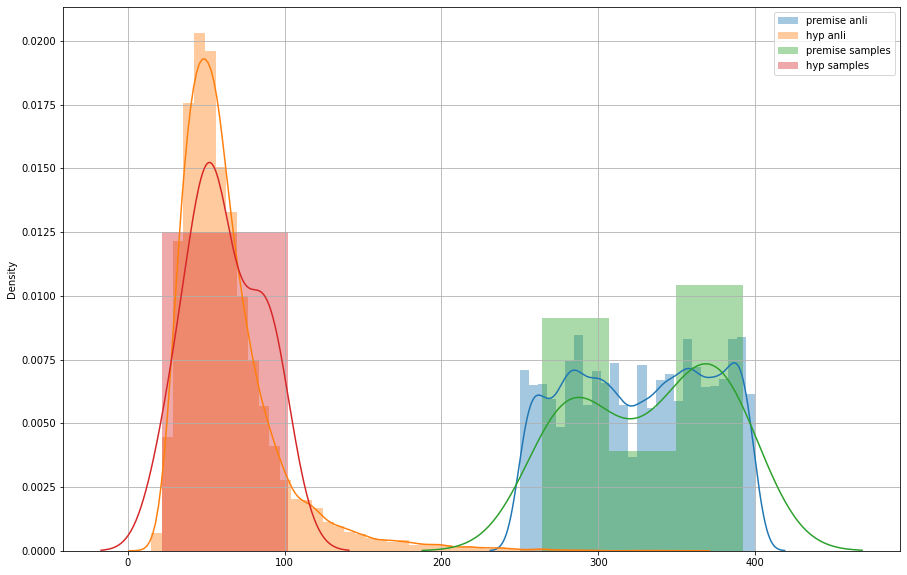

In [114]:
plt.figure(figsize=(15, 10))
sns.distplot([len(row['premise']) for row in anli], label='premise anli')
sns.distplot([len(row['hypothesis']) for row in anli], label='hyp anli')
sns.distplot([len(row['premise']) for row in samples], label='premise samples')
sns.distplot([len(row['hypothesis']) for row in samples], label='hyp samples')
plt.legend()
plt.grid()
plt.show()

## Смотрим на длину предложения в словах

/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

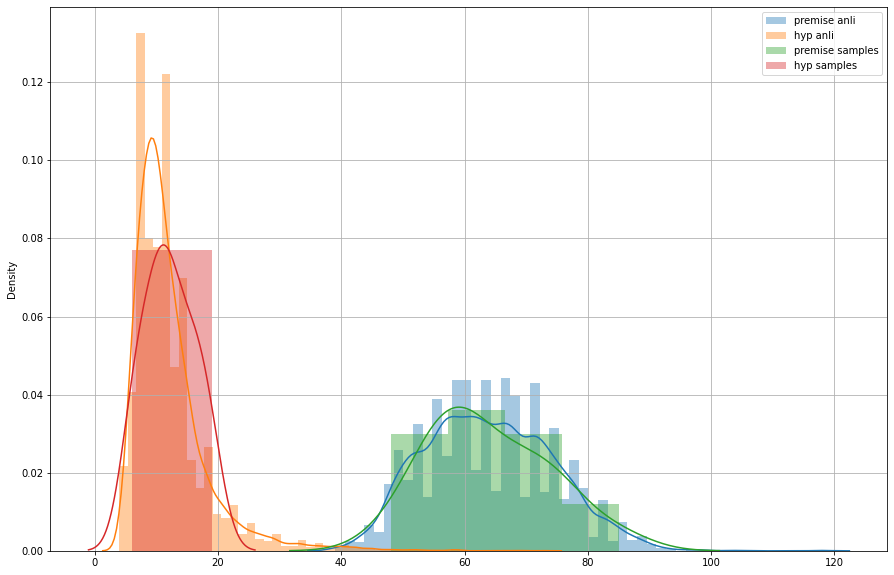

In [115]:
plt.figure(figsize=(15, 10))
sns.distplot([len(word_tokenize(row['premise'])) for row in anli], label='premise anli')
sns.distplot([len(word_tokenize(row['hypothesis'])) for row in anli], label='hyp anli')
sns.distplot([len(word_tokenize(row['premise'])) for row in samples], label='premise samples')
sns.distplot([len(word_tokenize(row['hypothesis'])) for row in samples], label='hyp samples')
plt.legend()
plt.grid()

## Смотрим на матрицу ошибок

In [10]:
model = ts.AutoModelForSequenceClassification.from_pretrained('./anli_42/anli_model_output_42/checkpoint-60', num_labels=3)

In [22]:
def to_text(instance):
    instance["text"] = instance['premise'] + tokenizer.sep_token + instance['hypothesis']
    return instance

samples_t = samples.map(to_text)

inputs = tokenizer([row['text'] for row in samples_t], return_tensors='pt', padding=True)
labels = torch.tensor([sample['label'] for sample in samples_t]).unsqueeze(0)  # Batch size 1
outputs = model(**inputs, labels=labels)
outputs


Loading cached processed dataset at cache/data/anli/plain_text/0.1.0/aabce88453b06dff21c201855ea83283bab0390bff746deadb30b65695755c0b/cache-1a9f32f5c615b99d.arrow


SequenceClassifierOutput(loss=tensor(0.0077, grad_fn=<NllLossBackward>), logits=tensor([[ 3.6612, -1.9563, -1.5807],
        [-1.6647, -1.7802,  3.7461],
        [-1.8362, -1.5275,  3.7543],
        [ 3.8298, -1.8118, -1.7828],
        [ 3.7644, -1.8760, -1.7718],
        [-2.1319,  3.9137, -2.0324],
        [-2.1976,  3.8739, -1.9140],
        [-1.4839, -1.8770,  3.6731],
        [-1.6912,  3.6387, -1.9025],
        [-2.2158,  3.8756, -1.6751],
        [-1.5330, -1.8690,  3.6112],
        [-2.1810,  3.8302, -1.8273],
        [ 3.6853, -1.9016, -1.7752],
        [ 3.6795, -1.8556, -1.6873],
        [-2.1126,  3.7280, -1.8602],
        [-2.1297,  3.8948, -1.9483],
        [ 3.4381, -1.8226, -1.5750],
        [-1.7706, -1.7894,  3.7655]], grad_fn=<AddmmBackward>), hidden_states=None, attentions=None)

In [23]:
matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for sample, label in zip(samples, outputs.logits.argmax(axis=1)):
    matrix[sample['label']][label] += 1


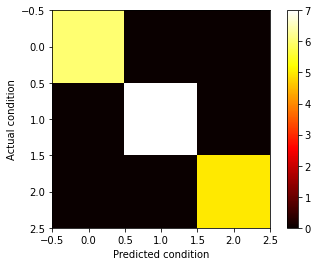

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(matrix, cmap='hot')
plt.colorbar()
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.show()


In [80]:
def to_text(instance):
    instance["text"] = instance['premise'] + tokenizer.sep_token + instance['hypothesis']
    return instance

def tokenize_function(instance):
    encoding = model(**tokenizer(instance['text'], return_tensors='pt', padding=True))
    return encoding


anli_t = anli.map(to_text).select(range(500)).remove_columns(['uid', 'premise', 'hypothesis', 'label', 'reason']).map(tokenize_function)


  0%|          | 0/16946 [00:00<?, ?ex/s]

  0%|          | 0/500 [00:00<?, ?ex/s]

In [81]:
anli_t[0]

{'text': 'The Parma trolleybus system (Italian: "Rete filoviaria di Parma" ) forms part of the public transport network of the city and "comune" of Parma, in the region of Emilia-Romagna, northern Italy. In operation since 1953, the system presently comprises four urban routes.</s>The trolleybus system has over 2 urban routes',
 'logits': [[-1.7396982908248901, 3.251699686050415, -2.0058319568634033]]}

In [82]:
matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

for i in range(len(anli_t)):
    logits = torch.tensor(anli_t[i]['logits'])
    label = logits[0].argmax()
    matrix[anli[i]['label']][label] += 1

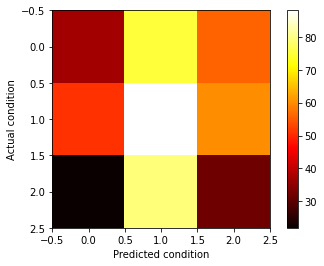

In [85]:
plt.imshow(matrix, cmap='hot')
plt.colorbar()
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.show()

## Выделяем части речи

In [98]:
pos_tag(word_tokenize('I walked with a beautiful girl gracefully'))

[('I', 'PRP'),
 ('walked', 'VBD'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('girl', 'NN'),
 ('gracefully', 'RB')]

In [99]:
def get_tag(tag):
    if tag in ['JJ', 'DT', 'PRP']: # Adjective Article Preposition
        return tag
    if tag.startswith('NN'):  # Noun
        return 'NN'
    if tag.startswith('VB'):  # Verb with variations
        return 'VB'
    return None

In [100]:
premise_tags = []
hypothesis_tags = []

for row in tqdm(samples):
    tags = pos_tag(word_tokenize(row['premise']))
    d = {}
    for tag in tags:
        t = get_tag(tag[1])
        if t is not None:
            d[t] = d.get(t, 0) + 1
    premise_tags.append(d)
    
    tags = pos_tag(word_tokenize(row['hypothesis']))
    d = {}
    for tag in tags:
        t = get_tag(tag[1])
        if t is not None:
            d[t] = d.get(t, 0) + 1
    hypothesis_tags.append(d)


100%|██████████| 18/18 [00:00<00:00, 314.38it/s]


In [101]:
all_p_tags = []
all_h_tags = []

for row in tqdm(anli):
    tags = pos_tag(word_tokenize(row['premise']))
    d = {}
    for tag in tags:
        t = get_tag(tag[1])
        if t is not None:
            d[t] = d.get(t, 0) + 1
    all_p_tags.append(d)
    
    tags = pos_tag(word_tokenize(row['hypothesis']))
    d = {}
    for tag in tags:
        t = get_tag(tag[1])
        if t is not None:
            d[t] = d.get(t, 0) + 1
    all_h_tags.append(d)


100%|██████████| 16946/16946 [00:54<00:00, 308.61it/s]


## Смотрим на распределение частей речи

In [102]:
print(set(tags.get('DT', 0) for tags in premise_tags))
print(set(tags.get('NN', 0) for tags in premise_tags))
print(set(tags.get('JJ', 0) for tags in premise_tags))
print(set(tags.get('PRP', 0) for tags in premise_tags))
print(set(tags.get('VB', 0) for tags in premise_tags))


{1, 3, 4, 5, 6, 7, 8, 9, 10}
{18, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31}
{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2}
{3, 4, 5, 6, 7, 8, 10}


/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

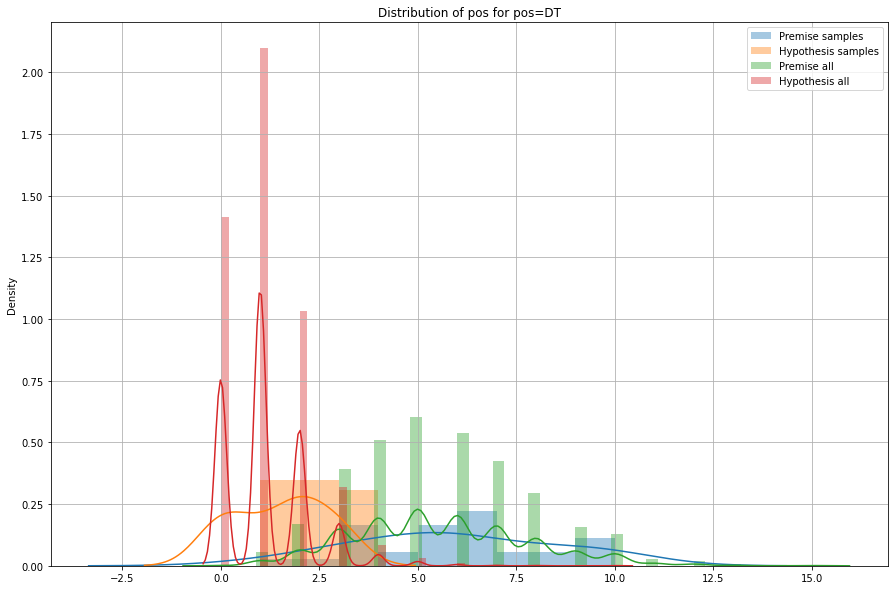

In [116]:
def plot_for_pos(pos):
    plt.figure(figsize=(15, 10))
    sns.distplot([tags.get(pos, 0) for tags in premise_tags], bins=sorted(tags.get(pos, 0) for tags in premise_tags), label='Premise samples')
    sns.distplot([tags.get(pos, 0) for tags in hypothesis_tags], bins=sorted(tags.get(pos, 0) for tags in premise_tags), label='Hypothesis samples')
    sns.distplot([tags.get(pos, 0) for tags in all_p_tags], label='Premise all')
    sns.distplot([tags.get(pos, 0) for tags in all_h_tags], label='Hypothesis all')
    plt.title('Distribution of pos for pos=' + pos)
    plt.legend()
    plt.grid()
    plt.show()
plot_for_pos('DT')


/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: Ru

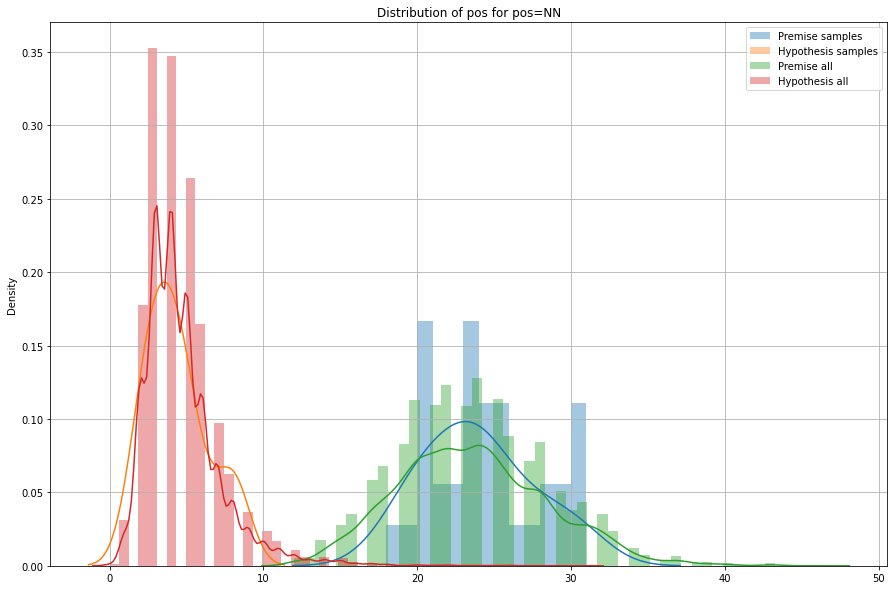

In [117]:
plot_for_pos('NN')


/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

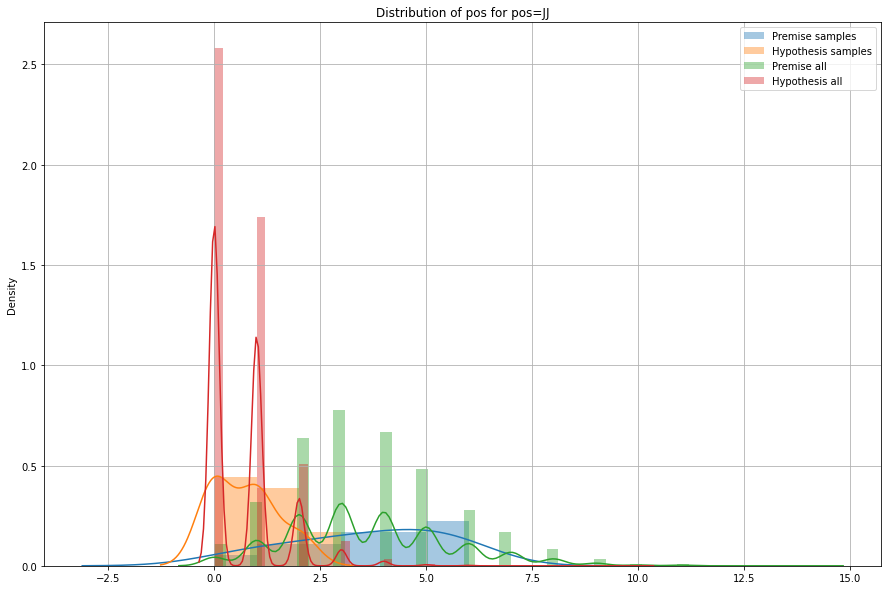

In [118]:
plot_for_pos('JJ')
 

/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

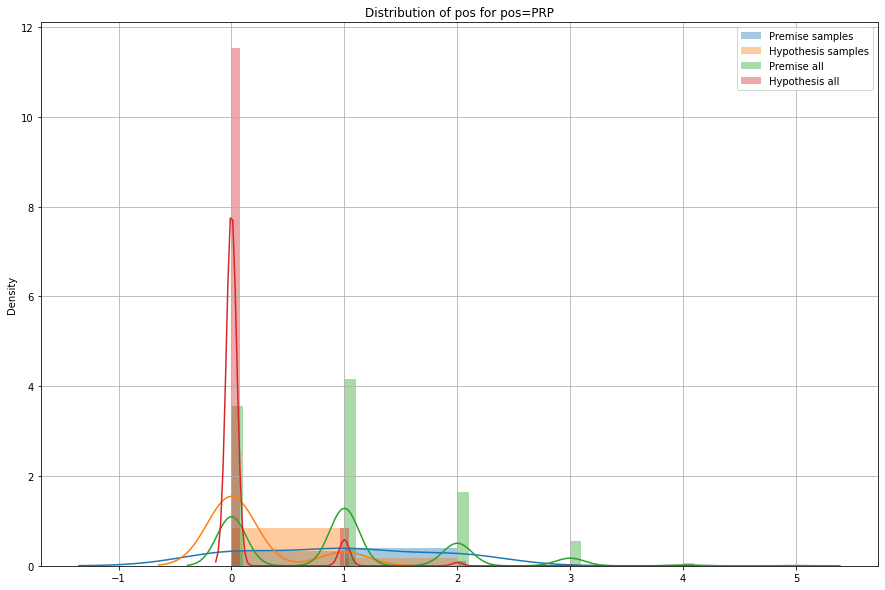

In [119]:
plot_for_pos('PRP')


/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/user/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/jovyan/.imgenv-find-ideal-query-0/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

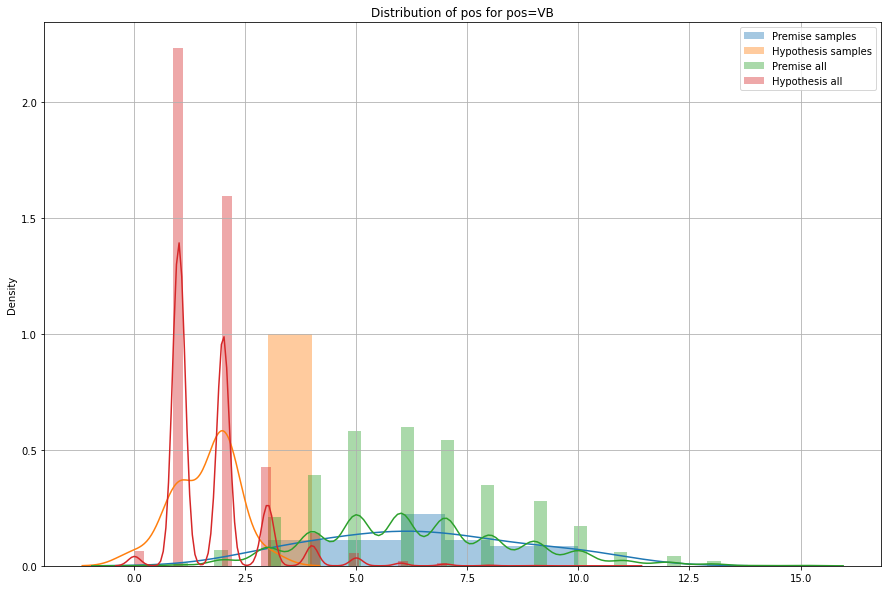

In [120]:
plot_for_pos('VB')